Programa que le todos as sequências do arquivo fasta (Influenza H3N2) e calcula:
1) Número total de nucleotídeos  e de A, T C e G de cada sequência;


2) Conteúdo GC para cada sequência.


3) Temperatura de anelamento (melting) do DNA (DNA melting temperature), para cada gene (sequência), utilizando a conteúdo GC e [Na+] = 100 mM. 

**ALGORITMO**

Contar quantas vezes cada letra (A, T, C, G) aparece na sequência;

Somar a quantidade de C e G e dividir pelo total de letras da sequência depois multuplicar por 100 para saber a porcentagem de C e G em relação ao total; 

Fazer isso repetidas vezes até fazer com todas as sequências do arquivo;

Contar quantas sequências tem no arquivo

Calcular a DNA melting temperature para cada sequência usando a fórmula :

TM= 64.9 + 0.41 * ((C+G/total de letras da sequência)*100]) - (500 / total de letras da sequência); 

Fazer uma tabela com as informações adquiridas nos passos acima, informando o CG em porcentagem e o TM de cada sequência;

Fazer um gráfico relacionando o CG em porcentagem (abscissa) e a DNA melting temperature (ordenada).

**CÓDIGO**

In [ ]:
!pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from Bio import SeqIO
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Influenza H3N2.fasta to Influenza H3N2.fasta


In [ ]:
#Abre o arquivo
fasta_sequencias = SeqIO.parse(open('Influenza H3N2.fasta'),'fasta')

**Número de sequências de DNA**

**Número de diferentes  nucleotideos (A, T, C e G) em cada sequência e total**

**Conteúdo GC de cada sequência**

In [ ]:
vet_gc = []
vet_tamanho= []
vet_id=[]
qnt_sequencias = 0

for seq_atual in fasta_sequencias:
    # obtém a sequência de nucleotídeos
    sequencia = seq_atual.seq
    vet_id.append (seq_atual.id)
   
    # conta o número total de nucleotídeos na sequência
    total_nucleotideos = len(sequencia)
    vet_tamanho.append(total_nucleotideos)

    # conta o número de cada nucleotídeo na sequência
    a = sequencia.count('A')
    t = sequencia.count('T')
    c = sequencia.count('C')
    g = sequencia.count('G')

    # calcula o conteúdo de GC da sequência
    gc = ((c + g) / (a + t + c + g)) * 100 

    #add a lista gc
    vet_gc.append(gc)


    # imprime os resultados
    print('Sequência:', seq_atual.id)
    print('Número total de nucleotídeos:', total_nucleotideos)
    print('Número de A:', a)
    print('Número de T:', t)
    print('Número de C:', c)
    print('Número de G:', g)
    print("Conteúdo de GC:", gc,"%")
    print('  ')

    qnt_sequencias+=1

print ("Existem", qnt_sequencias, "sequências de DNA no arquivo")

Sequência: NC_007373.1
Número total de nucleotídeos: 2341
Número de A: 810
Número de T: 536
Número de C: 425
Número de G: 570
Conteúdo de GC: 42.503203759077316 %
  
Sequência: NC_007372.1
Número total de nucleotídeos: 2341
Número de A: 831
Número de T: 521
Número de C: 460
Número de G: 529
Conteúdo de GC: 42.24690303289192 %
  
Sequência: NC_007371.1
Número total de nucleotídeos: 2233
Número de A: 761
Número de T: 541
Número de C: 418
Número de G: 513
Conteúdo de GC: 41.692789968652036 %
  
Sequência: NC_007366.1
Número total de nucleotídeos: 1762
Número de A: 600
Número de T: 422
Número de C: 353
Número de G: 387
Conteúdo de GC: 41.99772985244041 %
  
Sequência: NC_007369.1
Número total de nucleotídeos: 1566
Número de A: 515
Número de T: 334
Número de C: 303
Número de G: 414
Conteúdo de GC: 45.785440613026815 %
  
Sequência: NC_007368.1
Número total de nucleotídeos: 1467
Número de A: 463
Número de T: 377
Número de C: 285
Número de G: 342
Conteúdo de GC: 42.740286298568506 %
  
Sequên

**Temperatura de Melting para cada sequência**

In [ ]:
vet_tm=[]
#Calcula o tm
for i in range(len(vet_id)):
  tm = 64.9 + (0.41 * (vet_gc[i])) - (500 / vet_tamanho[i])
  vet_tm.append(tm)

for i in range(len(vet_id)):
  print("O DNA melting temperature da Sequência", vet_id[i], "é" , vet_tm[i])


O DNA melting temperature da Sequência NC_007373.1 é 82.11272960273388
O DNA melting temperature da Sequência NC_007372.1 é 82.00764630499786
O DNA melting temperature da Sequência NC_007371.1 é 81.77012987012988
O DNA melting temperature da Sequência NC_007366.1 é 81.83530079455166
O DNA melting temperature da Sequência NC_007369.1 é 83.35274584929758
O DNA melting temperature da Sequência NC_007368.1 é 82.08268575323791
O DNA melting temperature da Sequência NC_007367.1 é 83.57575462512172
O DNA melting temperature da Sequência NC_007370.1 é 81.42921348314607


**Tabela com Temperatura de Melting para cada sequência**

In [ ]:
# criando um dicionário com os dados da tabela
dados = {'ID da sequência': [vet_id[0], vet_id[1], vet_id[2], vet_id[3], vet_id[4], vet_id[5],vet_id [6], vet_id[7]],
         'GC': [vet_gc[0], vet_gc[1], vet_gc[2], vet_gc[3], vet_gc[4], vet_gc[5], vet_gc[6], vet_gc[7]],
         'TM': [vet_tm[0], vet_tm[1], vet_tm[2], vet_tm[3], vet_tm[4], vet_tm[5], vet_tm[6], vet_tm[7]]}

# criando um objeto DataFrame com os dados
tabela = pd.DataFrame(dados)

# exibindo a tabela
print(tabela)

  ID da sequência         GC         TM
0     NC_007373.1  42.503204  82.112730
1     NC_007372.1  42.246903  82.007646
2     NC_007371.1  41.692790  81.770130
3     NC_007366.1  41.997730  81.835301
4     NC_007369.1  45.785441  83.352746
5     NC_007368.1  42.740286  82.082686
6     NC_007367.1  46.738072  83.575755
7     NC_007370.1  41.685393  81.429213


***Gráfico Conteúdo GC x  Temperatura de Melting ***

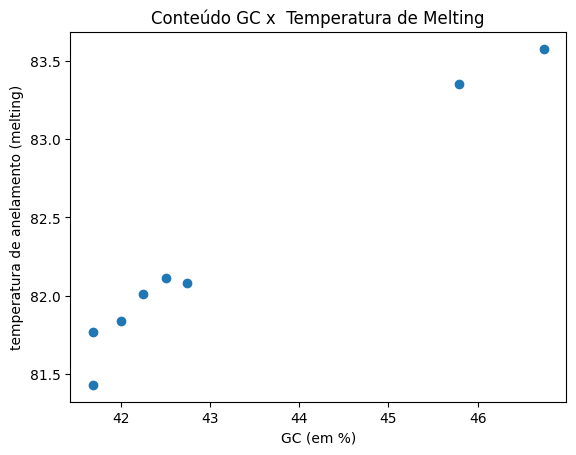

In [ ]:
# Plotar gráfico de pontos
plt.scatter(vet_gc, vet_tm)

# Adicionar rótulos aos eixos x e y
plt.xlabel('GC (em %)')
plt.ylabel('Temperatura de anelamento (melting)')

# Adicionar título
plt.title('Conteúdo GC x  Temperatura de Melting')

# Exibir o gráfico
plt.show()

